In [1]:
import torch 
import numpy as np
from utils.siglip_experiment import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Basic Experiment with Trainable Temperature and Fixed Relative Bias


In [2]:
torch.manual_seed(50)

n_classes = 20
dim = 3
n_epochs = int(1e4)
device_str = 'cuda' if torch.cuda.is_available() else 'cpu'

rb = 0
bias_is_trainable = False
temperature_is_trainable = True

t = 10  
final_losses = []
final_temps = []
final_embeddings = []

# print(f"Using device: {device_str}")
print(f"Running experiments with: n_classes={n_classes}, dim={dim}, n_epochs={n_epochs}")

print(f"\nInitial  Relative Bias: {rb:.2f}")
experiment = SigLIPExperiment(
    n_classes=n_classes,
    dim=dim,
    n_epochs=n_epochs,
    device=device_str
)

U_final, V_final, criterion_final, losses_history = experiment.train(
    relative_bias=rb,
    temperature=t,
    trainable_temp=temperature_is_trainable,
    trainable_bias=bias_is_trainable
)

final_loss = losses_history[-1]
final_temp = criterion_final.get_temperature()

final_losses.append(final_loss)
final_temps.append(final_temp.detach().item())  # Detach and convert to Python scalar


print(f"Final Loss: {final_loss:.4f}")
print(f"Final Temperature: {final_temp:.4f}")

final_embeddings.append((U_final, V_final))

Running experiments with: n_classes=20, dim=3, n_epochs=10000

Initial  Relative Bias: 0.00
Final Loss: 0.0000
Final Temperature: 950.9849


In [3]:
Unp = U_final.cpu().detach().numpy()
Vnp = V_final.cpu().detach().numpy()
Z = Unp @ Vnp.T
minsame = np.min(np.diag(Z))
maxdifff = np.max(Z - np.eye(Z.shape[0])*3)
margin = (minsame - maxdifff)/2
print(f'Relative bias {rb:0.3f}, margin {margin:0.3f}')

Relative bias 0.000, margin 0.012


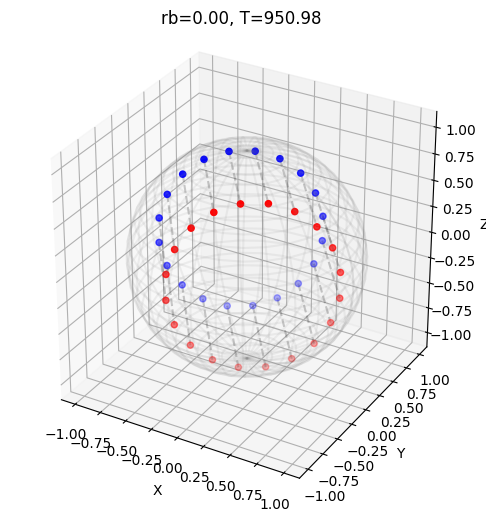

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
experiment.plot_vectors(
        U_final,
        V_final,
        criterion_final,
        ax=ax,
        title = f"({margin:.2f},{rb:.1f})-Constellation Found\n Via Gradient Descent"
    )
plt.savefig("logs/basicpicture.png",dpi=300, bbox_inches='tight')
plt.show